<a href="https://colab.research.google.com/github/CLiNTPELiX/img_classification/blob/main/pre_trained_imagenet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow as tf

In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
from google.colab import drive
import os
drive.mount._DEBUG = True
drive.mount('/content/gdrive', force_remount=True)
root_path = 'gdrive/MyDrive/Colab Notebooks/Classif_img_CNN/datas/'

unset HISTFILE; export PS1="root@cda567d466e1-08200e40ccf7417088ebd4b87dd2d7d5: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@cda567d466e1-08200e40ccf7417088ebd4b87dd2d7d5: umount -f /content/gdrive || umount /content/gdrive; pkill -9 -x drive
umount: /content/gdrive: no mount point specified.
umount: /content/gdrive: no mount point specified.
root@cda567d466e1-08200e40ccf7417088ebd4b87dd2d7d5: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@cda567d466e1-08200e40ccf7417088ebd4b87dd2d7d5: ( while `sleep 0.5`; do if [[ -d "/content/gdrive" && "$(ls -A /content/gdrive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 90
root@cda567d466e1-08200e40ccf7417088ebd4b87dd2d7d5: cat /tmp/tmpdxv8efzm/drive.fifo | head -1 | ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instan

In [ ]:
#os.getcwd

In [ ]:
#os.chdir("/content/gdrive/MyDrive/Colab Notebooks/Classif_img_CNN")

In [ ]:
file = ''.join(root_path+'AnimalFace.zip')
file

'gdrive/MyDrive/Colab Notebooks/Classif_img_CNN/datas/AnimalFace.zip'

In [ ]:
!rm -rf datas
!mkdir datas
import zipfile
with zipfile.ZipFile(file,"r") as zip_ref:
    zip_ref.extractall("datas")

In [ ]:
#!rm '/content/datas/Image/DogHead/dog000590a.jpg'

In [ ]:
#!find . -name 'dog000590a.jpg'

In [ ]:
src = '/content/datas/Image'
import os
from skimage.io import imread
for subdir in os.listdir(src):
    print(subdir)
    current_path = os.path.join(src, subdir)
    #new_path = os.path.join(src, subdir[:-4])
    #os.rename(curent_path, new_path)
    nb = 0
    for file in os.listdir(current_path):
        if (file[-3:] in {'bmp', 'gif'}):
            print(os.path.join(current_path, file))
            os.remove(os.path.join(current_path, file))
        if file=="dog000590a.jpg":
            print(os.path.join(current_path, file))
            os.remove(os.path.join(current_path, file))
        nb +=1

HumanHead
ElephantHead
BearHead
PigHead
TigerHead
/content/datas/Image/TigerHead/tiger-tatiana.gif
Natural
DuckHead
EagleHead
DeerHead
WolfHead
SheepHead
MouseHead
CatHead
/content/datas/Image/CatHead/cat1060a.bmp
LionHead
PigeonHead
DogHead
/content/datas/Image/DogHead/dog000590a.jpg
CowHead
/content/datas/Image/CowHead/cow1.gif
ChickenHead
RabbitHead
PandaHead
MonkeyHead


In [ ]:
import tensorflow as tf

print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.4.1


## Create Dataset

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
#BATCH_SIZE =  16 * tpu_strategy.num_replicas_in_sync
BATCH_SIZE =  64
IMG_SIZE = 150
src = './datas/Image' 

In [ ]:
train_ds = image_dataset_from_directory(directory=src, 
                                        validation_split=0.1,
                                        subset='training',
                                        labels='inferred', 
                                        label_mode='categorical',
                                        seed=123,
                                        image_size=(IMG_SIZE, IMG_SIZE),
                                        batch_size=BATCH_SIZE)

Found 2415 files belonging to 21 classes.
Using 2174 files for training.


In [ ]:
val_ds = image_dataset_from_directory(directory=src, 
                                        validation_split=0.1,
                                        subset='validation',
                                        labels='inferred', 
                                        label_mode='categorical',
                                        seed=123,
                                        image_size=(IMG_SIZE, IMG_SIZE),
                                        batch_size=BATCH_SIZE)



Found 2415 files belonging to 21 classes.
Using 241 files for validation.


header_size + row_size * abs_height

In [ ]:
class_names = train_ds.class_names
print(class_names)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


## Preview images

In [ ]:
import matplotlib.pyplot as plt


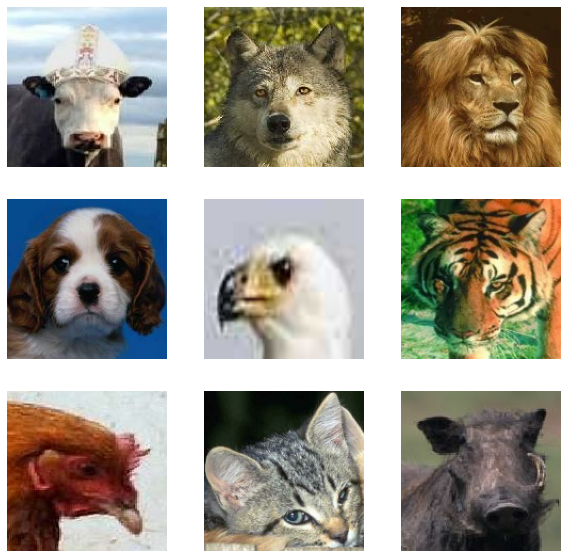

In [ ]:
plt.figure(figsize=[10,10])
for image_batch, label_batch in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis("off")



In [ ]:
image_batch.shape

TensorShape([64, 150, 150, 3])

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1024).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Data Augmentation

Implementing data augmentation using keras.experimental.preprocessing.

Preprocessing the data and applying augmentation inside the model. This will apply preprocessing synchronously with the model execution, and on GPU. Also saves from implementing server-side logic for preprocessing.


In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.2),
        tf.keras.layers.experimental.preprocessing.RandomContrast(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    ], name="data_augmentation")



### Preview Augmentation

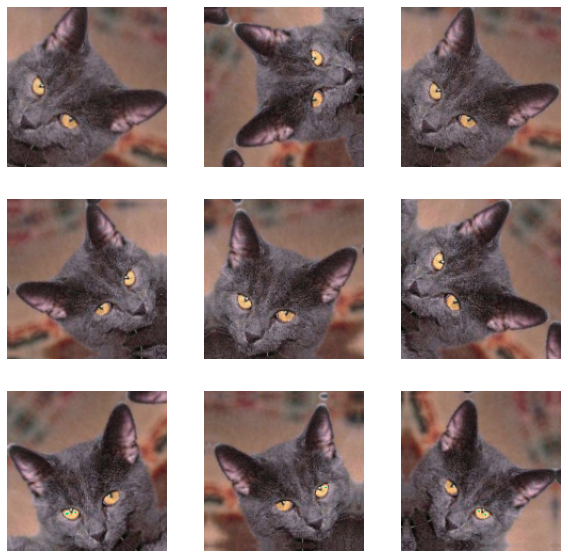

In [ ]:
plt.figure(figsize=[10,10])
for image_batch, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(image_batch)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[2].numpy().astype('uint8'))
        plt.axis("off")

In [ ]:
from keras.backend import clear_session
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

## Build a model

In [ ]:
from tensorflow import keras
from keras.backend import clear_session
import numpy as np

clear_session()

base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.), the normalization layer
# does the following, outputs = (inputs - mean) / sqrt(var)
norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
x = norm_layer(x)
norm_layer.set_weights([mean, var])

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
for i in range(1):
    x = keras.layers.Dense(units=256, activation='elu')(x)
    x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(len(class_names), activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.summary()


83689472/83683744 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, 150, 150, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 150, 150, 3)       7         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
______________________________________________________________

### Train the top layer

In [ ]:
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), ## True / False
# #model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), ## True / False
#              optimizer='adam',
#              metrics=['accuracy'])

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),  # Low learning rate
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

epochs = 20
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)


Epoch 1/20
34/34 [==============================] - 49s 456ms/step - loss: 2.7930 - accuracy: 0.2258 - val_loss: 0.9305 - val_accuracy: 0.8963
Epoch 2/20
34/34 [==============================] - 12s 342ms/step - loss: 1.1091 - accuracy: 0.7433 - val_loss: 0.3651 - val_accuracy: 0.9627
Epoch 3/20
34/34 [==============================] - 12s 341ms/step - loss: 0.6541 - accuracy: 0.8429 - val_loss: 0.2432 - val_accuracy: 0.9627
Epoch 4/20
34/34 [==============================] - 12s 344ms/step - loss: 0.4835 - accuracy: 0.8741 - val_loss: 0.2072 - val_accuracy: 0.9668
Epoch 5/20
34/34 [==============================] - 12s 344ms/step - loss: 0.4497 - accuracy: 0.8744 - val_loss: 0.1721 - val_accuracy: 0.9627
Epoch 6/20
34/34 [==============================] - 12s 344ms/step - loss: 0.3775 - accuracy: 0.8972 - val_loss: 0.1587 - val_accuracy: 0.9627
Epoch 7/20
34/34 [==============================] - 12s 343ms/step - loss: 0.3603 - accuracy: 0.8951 - val_loss: 0.1541 - val_accuracy: 0.9627

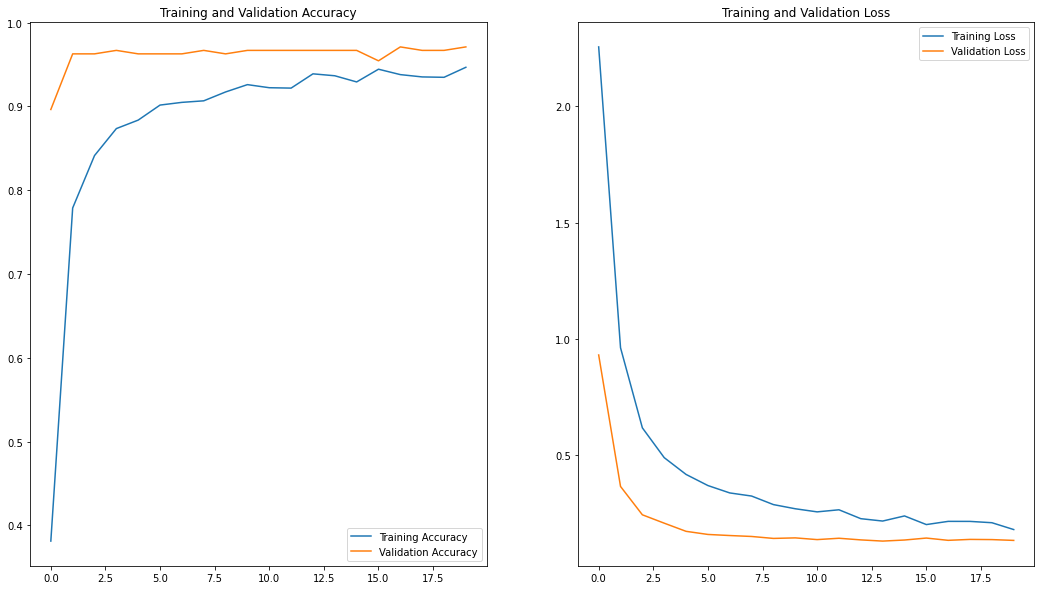

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
def plot_res(epochs_range, acc, val_acc, loss, val_loss):
    plt.figure(figsize=(18, 10))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_res(epochs_range, acc, val_acc, loss, val_loss)

## Do a round of fine-tuning of the entire model

In [ ]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.

base_model.trainable = True
model.summary()

# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#              optimizer='adam',
#              metrics=['accuracy'])

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

epochs = 10
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, 150, 150, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 150, 150, 3)       7         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544

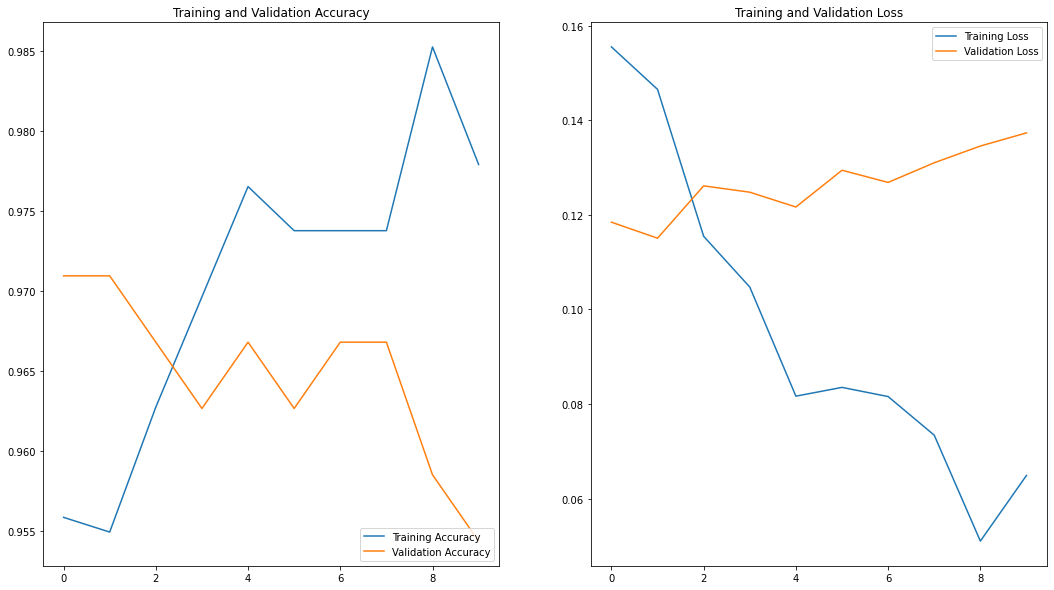

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plot_res(epochs_range, acc, val_acc, loss, val_loss)

In [ ]:
model.save("pretrained_model.h5") # Testing if model is ok

In [ ]:
del model
model = tf.keras.models.load_model('pretrained_model.h5')

In [ ]:
#!cp /content/pretrained_model.h5 gdrive/MyDrive/Colab\ Notebooks/Classif_img_CNN/datas/


## Predict

In [ ]:
import os, random

In [ ]:
# dir_path = 'datas/Image/'
# class_label = random.choice(os.listdir("datas/Image/"))
# print("Class Label chosen: ", class_label)
# file = random.choice(os.listdir("datas/Image/"+class_label))
# print(file)

# file_path = dir_path + class_label + "/" + file
# print(file_path)

In [ ]:
from skimage.transform import resize
from google.colab import files
image = files.upload()
print(image.keys())
for k, v in image.items(): pass

Saving TAYLOR_SWIFT_CATS_SWIFT2.jpg to TAYLOR_SWIFT_CATS_SWIFT2.jpg
dict_keys(['TAYLOR_SWIFT_CATS_SWIFT2.jpg'])


(-0.5, 149.5, 149.5, -0.5)

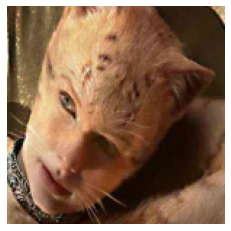

In [ ]:
im = imread(k) # 333636a798.jpeg ## fda9a545f5.jpeg
im = resize(im, (IMG_SIZE, IMG_SIZE))
plt.imshow(im)
plt.axis('off')

In [ ]:
img = tf.keras.preprocessing.image.load_img(k, target_size=(IMG_SIZE, IMG_SIZE, 3))

#transform pic into array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Create an array nested in array
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
#score = tf.nn.softmax(predictions[0])

print(predictions)

[[5.9794125e-05 9.4942433e-01 8.7942129e-07 3.1872437e-04 4.0582636e-06
  4.6898180e-04 2.0097630e-05 1.1129562e-04 3.2227945e-05 1.0306939e-05
  4.5584191e-02 8.9672840e-06 7.0067734e-04 1.1486023e-03 2.3497387e-05
  1.8030579e-03 2.0079844e-06 3.2881762e-05 3.8563667e-05 1.4171185e-04
  6.5253029e-05]]


In [ ]:
print(f"The prediction is '{class_names[np.argmax(predictions)]}' with a score of {np.max(predictions)*100:.2f}%")

The prediction is 'CatHead' with a score of 94.94%


# Nouvelle section

In [ ]:
print(class_names)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


In [ ]:
class_names.sort()
class_names

['BearHead',
 'CatHead',
 'ChickenHead',
 'CowHead',
 'DeerHead',
 'DogHead',
 'DuckHead',
 'EagleHead',
 'ElephantHead',
 'HumanHead',
 'LionHead',
 'MonkeyHead',
 'MouseHead',
 'Natural',
 'PandaHead',
 'PigHead',
 'PigeonHead',
 'RabbitHead',
 'SheepHead',
 'TigerHead',
 'WolfHead']

In [ ]:
# file = ''.join('/content/gdrive/MyDrive/animals.zip')
# file

'/content/gdrive/MyDrive/animals.zip'

In [ ]:
# !mkdir datas
# import zipfile
# with zipfile.ZipFile(file,"r") as zip_ref:
#     zip_ref.extractall("datas")

mkdir: cannot create directory ‘datas’: File exists


In [ ]:
# BATCH_SIZE = 64
# IMG_SIZE = 150
# src_test = './datas/raw-img'

In [ ]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", \
             "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", \
             "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo", "ragno": "spider"}

In [ ]:
# import shutil
# print(class_names)
# for subdir in os.listdir(src_test):
#     print(translate[subdir])
#     curent_path = os.path.join(src_test, subdir) 
#     print(curent_path)
#     if translate[subdir].capitalize() not in class_names:
#         print(subdir, "--> Not in the training set")
#         shutil.rmtree(curent_path)
#     else:
#         new_path = os.path.join(src_test, translate[subdir].capitalize())
#         os.rename(curent_path, new_path)

# for dir in class_names:
#     if dir not in os.listdir(src_test):
#         new_path =  os.path.join(src_test, dir) 
#         os.mkdir(new_path)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']
spider
./datas/raw-img/ragno
ragno --> Not in the training set
chicken
./datas/raw-img/gallina
gallina --> Not in the training set
elephant
./datas/raw-img/elefante
elefante --> Not in the training set
cat
./datas/raw-img/gatto
gatto --> Not in the training set
squirrel
./datas/raw-img/scoiattolo
scoiattolo --> Not in the training set
butterfly
./datas/raw-img/farfalla
farfalla --> Not in the training set
horse
./datas/raw-img/cavallo
cavallo --> Not in the training set
cow
./datas/raw-img/mucca
mucca --> Not in the training set
sheep
./datas/raw-img/pecora
pecora --> Not in the training set
dog
./datas/raw-img/cane
cane --> Not in the training set


In [ ]:
# test_ds = image_dataset_from_directory(directory=src_test, 
#                                         labels='inferred', 
#                                         label_mode='categorical',
#                                         seed=123,
#                                         image_size=(IMG_SIZE, IMG_SIZE),
#                                         batch_size=BATCH_SIZE)

In [ ]:
# test_class_names =test_ds.class_names
# print(test_class_names)

In [ ]:
# y_pred = model.predict(val_ds, batch_size=BATCH_SIZE, use_multiprocessing=True) ## val_ds // test_ds
# y_pred_class = np.argmax(y_pred, axis=1)
# y_pred_class

In [ ]:
# y_pred.shape

In [ ]:
# import seaborn as sns
# variance_pred = np.var(y_pred, axis=1)
# print(variance_pred.shape)

# fig = plt.figure(figsize=[12,8])
# sns.displot(x = variance_pred, bins=20, height=8, kde=True) ## , norm_hist=True
# plt.title('Predicted probability variance distribution')

In [ ]:
# y_pred_class = np.argmax(y_pred, axis=1)

# # iterator = test_ds.make_initializable_iterator()
# # feats, label = iterator.get_next()


# # img, labels = a.next()
# all_labels = np.array([])
# for elt in test_ds.as_numpy_iterator():
#     img, labels = elt
#     all_labels.append(labels[:])
# all_labels
# labels

In [ ]:
# test = np.array([[0.4, 0.6, 0.2], [2, 1, 1]])
# test_one_hot = np.array([[1 if elt==max(pred) else 0 for elt in pred] for pred in test])
# test_one_hot

In [ ]:
# labels = {value: idx for idx, value in enumerate(class_names)}
# labels

In [ ]:
# true_categories = tf.concat([y for x, y in val_ds], axis=0) ## val_ds // test_ds
# true_categories

In [ ]:
# y_true = np.argmax(true_categories, axis=1)
# y_true

In [ ]:
# y_pred_class

In [ ]:
# print(len(y_true), len(y_pred_class))

In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_true, y_pred_class, target_names=class_names))

In [ ]:
# from sklearn.metrics import confusion_matrix
# confusionMatrix = confusion_matrix(y_true, y_pred_class)

In [ ]:
# import itertools
# def plot_confusion_matrix(cm, labels,
#                           normalize=True,
#                           title='Confusion Matrix (Validation Set)',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         #print("Normalized confusion matrix")
#     else:
#         #print('Confusion matrix, without normalization')
#         pass

#     #print(cm)

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(labels))
#     plt.xticks(tick_marks, labels, rotation=45)
#     plt.yticks(tick_marks, labels)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     #plt.savefig('./figures/conf_matrix.png')

# plt.figure(figsize=(20,10))
# plot_confusion_matrix(confusionMatrix, labels=class_names)

In [ ]:
# X_train = np.empty(shape=(0, IMG_SIZE, IMG_SIZE, 3))
# y_train = np.empty(shape=(0, 21))
# for elt in train_ds.as_numpy_iterator():
#     X_train = np.concatenate((X_train, elt[0]), axis=0)
#     y_train = np.concatenate((y_train, elt[1]), axis=0)

# print(X_train.shape)
# print(y_train.shape)

## Grid search

In [ ]:
# def create_model(dropout, ):
#     base_model = keras.applications.Xception(
#         weights="imagenet",  # Load weights pre-trained on ImageNet.
#         input_shape=(IMG_SIZE, IMG_SIZE, 3),
#         include_top=False,
#     )  # Do not include the ImageNet classifier at the top.

#     # Freeze the base_model
#     base_model.trainable = False

#     # Create new model on top
#     inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
#     x = data_augmentation(inputs)  # Apply random data augmentation

#     # Pre-trained Xception weights requires that input be normalized
#     # from (0, 255) to a range (-1., +1.), the normalization layer
#     # does the following, outputs = (inputs - mean) / sqrt(var)
#     norm_layer = keras.layers.experimental.preprocessing.Normalization()
#     mean = np.array([127.5] * 3)
#     var = mean ** 2
#     # Scale inputs to [-1, +1]
#     x = norm_layer(x)
#     norm_layer.set_weights([mean, var])

#     # The base model contains batchnorm layers. We want to keep them in inference mode
#     # when we unfreeze the base model for fine-tuning, so we make sure that the
#     # base_model is running in inference mode here.
#     x = base_model(x, training=False)
#     x = keras.layers.GlobalAveragePooling2D()(x)
#     x = keras.layers.Dropout(dropout)(x)  # Regularize with dropout
#     outputs = keras.layers.Dense(len(class_names), activation='softmax')(x)
#     model = keras.Model(inputs, outputs)

#     model.summary()
#     return model


In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier
# model = KerasClassifier(build_fn=create_model)